In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



In [16]:
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [17]:
def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')
    print(f'Test Dataset: Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Squared Error: {mean_squared_error(y_train, y_pred_train):.2f}')
    print(f'Test Dataset: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Percentage Error: {mean_squared_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

In [18]:
# create regression model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)


LinearRegression()

In [19]:
X_train.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [20]:
# model coefficient
model.coef_

array([  0.13768782, -23.06446772,   5.84636265,   1.19709252,
        -1.28168474,   0.81115203,   0.60165319,  10.15953917,
        67.1089624 ,   0.20159907])

In [21]:
# model intercept
model.intercept_

-341.3782363335064

In [22]:
# make predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
# determine the degress of polynomial
# PolynomialFeatures, include_bias = False
plm = PolynomialFeatures(degree=2, include_bias=False)
plm

PolynomialFeatures(include_bias=False)

In [23]:
# create new features
X_poly_test = plm.fit_transform(X_test)
X_poly_train = plm.fit_transform(X_train)
# create polynomial regression model
poly_reg_model = LinearRegression()
# fit the model
poly_reg_model.fit(X_poly_test, y_test)

LinearRegression()

In [24]:
poly_reg_model.coef_

array([ 1.24289766e+02, -4.13533860e+02,  1.43260627e+02, -9.61916116e+01,
        1.99753327e+02, -1.55046502e+02, -4.62233277e+02, -2.79440358e+03,
       -1.46705109e+04,  1.45935518e+00,  1.37030832e-01,  5.45180214e+00,
        5.15423944e-01, -1.85933306e-01,  1.40587986e+00, -1.32291882e+00,
       -1.77418736e+00, -5.11087741e+00, -2.97856859e+01, -8.53201008e-02,
       -1.24060150e+03,  2.27132587e+01,  5.86599582e+00, -4.09779877e+01,
        3.96078431e+01,  4.55679313e+01,  1.07779549e+02,  7.51388844e+02,
       -3.62084443e+00, -3.65869409e-01,  5.84814734e-02,  1.56823847e+00,
       -1.44703899e+00, -1.18404684e+00,  3.05031726e+00, -5.16051045e+01,
       -2.56304607e-01, -7.73752647e-02, -1.46921168e+00,  1.25472598e+00,
        1.78366923e+00,  3.82660483e+00,  2.84190699e+01,  4.15342031e-02,
        2.47667718e+00, -4.24015109e+00, -8.94664121e+00, -3.70219673e+01,
       -3.37403094e+01,  9.73476348e-02,  1.79062430e+00,  8.03296313e+00,
        3.24321247e+01,  

Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
Test Dataset: Mean Squared Error: 2900.19
Train Dataset: Mean Squared Error: 2868.55
Test Dataset: Mean Absolute Percentage Error: 0.37
Train Dataset: Mean Absolute Percentage Error: 2868.55
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


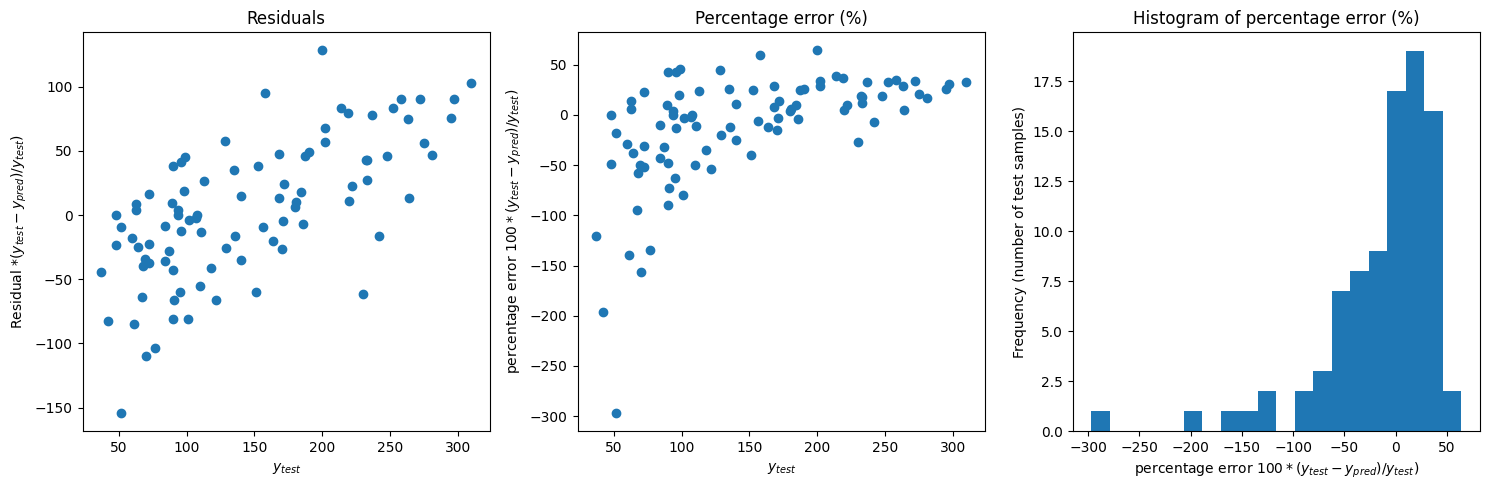

In [25]:
# predict values using polynomial regression model
y_pred_poly_test = poly_reg_model.predict(X_poly_test)
y_pred_poly_train = poly_reg_model.predict(X_poly_train)
# compare two models by MAE and MAPE
model_estimation(model, y_train, y_test, y_pred_train, y_pred_test)

Test Dataset: Mean Absolute Error: 19.45
Train Dataset: Mean Absolute Error: 166.65
Test Dataset: Mean Squared Error: 706.83
Train Dataset: Mean Squared Error: 112223.14
Test Dataset: Mean Absolute Percentage Error: 0.18
Train Dataset: Mean Absolute Percentage Error: 112223.14
y = 124.29 * x_0 + -413.53 * x_1 + 143.26 * x_2 + -96.19 * x_3 + 199.75 * x_4 + -155.05 * x_5 + -462.23 * x_6 + -2794.40 * x_7 + -14670.51 * x_8 + 1.46 * x_9 + 0.14 * x_10 + 5.45 * x_11 + 0.52 * x_12 + -0.19 * x_13 + 1.41 * x_14 + -1.32 * x_15 + -1.77 * x_16 + -5.11 * x_17 + -29.79 * x_18 + -0.09 * x_19 + -1240.60 * x_20 + 22.71 * x_21 + 5.87 * x_22 + -40.98 * x_23 + 39.61 * x_24 + 45.57 * x_25 + 107.78 * x_26 + 751.39 * x_27 + -3.62 * x_28 + -0.37 * x_29 + 0.06 * x_30 + 1.57 * x_31 + -1.45 * x_32 + -1.18 * x_33 + 3.05 * x_34 + -51.61 * x_35 + -0.26 * x_36 + -0.08 * x_37 + -1.47 * x_38 + 1.25 * x_39 + 1.78 * x_40 + 3.83 * x_41 + 28.42 * x_42 + 0.04 * x_43 + 2.48 * x_44 + -4.24 * x_45 + -8.95 * x_46 + -37.02 * x_4

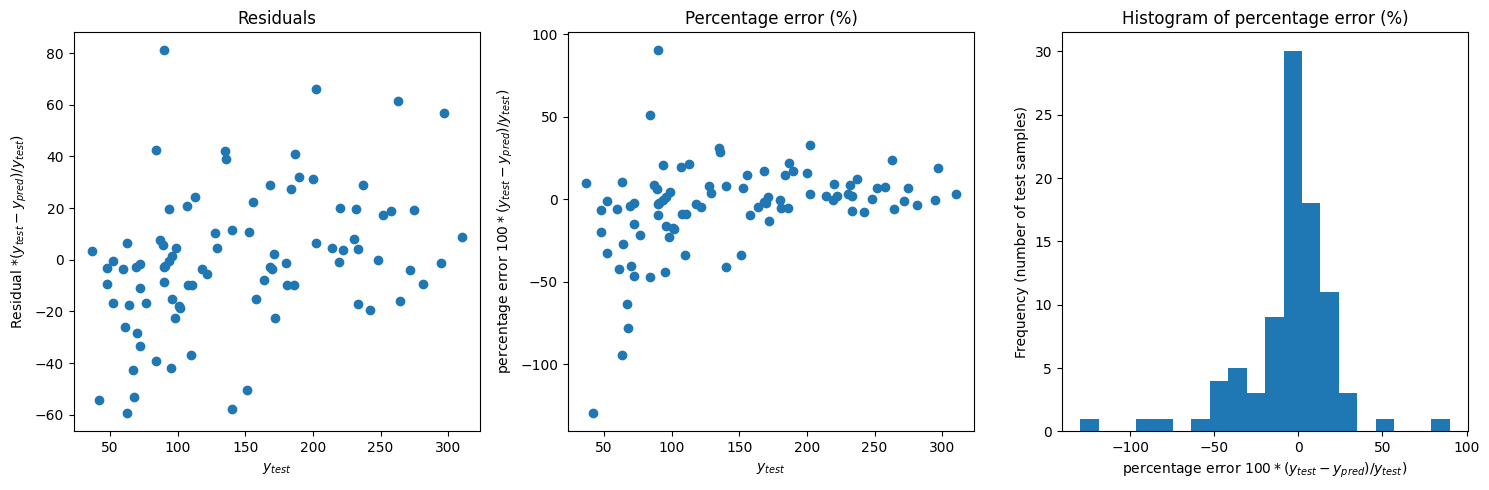

In [26]:
model_estimation(poly_reg_model, y_train, y_test, y_pred_poly_train, y_pred_poly_test)

**Question-1
How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values. Hint: for explaining the parameters of the polynomial regression, you can use poly.get_feature_names_out().**

In [27]:
plm.get_feature_names_out()

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'age^2', 'age sex', 'age bmi', 'age bp', 'age s1', 'age s2',
       'age s3', 'age s4', 'age s5', 'age s6', 'sex^2', 'sex bmi',
       'sex bp', 'sex s1', 'sex s2', 'sex s3', 'sex s4', 'sex s5',
       'sex s6', 'bmi^2', 'bmi bp', 'bmi s1', 'bmi s2', 'bmi s3',
       'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s1', 'bp s2', 'bp s3',
       'bp s4', 'bp s5', 'bp s6', 's1^2', 's1 s2', 's1 s3', 's1 s4',
       's1 s5', 's1 s6', 's2^2', 's2 s3', 's2 s4', 's2 s5', 's2 s6',
       's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5', 's4 s6',
       's5^2', 's5 s6', 's6^2'], dtype=object)

In [28]:
co_f = poly_reg_model.coef_
print("number of coeffients: ", co_f.size)

number of coeffients:  65


**There are 10 parameters for linear regression such as  age, sex, bmi, bp, s1, s2, s3, s4, s5, s6.

There are 65 parameters for polynomial regression model. The 65 parameters are the combinations of the 10 parameters above.**

QUESTION -2   Which model would you choose for deployment, and why?
 
 Considering these metrics, 
 there is no significant difference in MAE and MAPE and it is clear that linear regression perform better than poynomial regression becuase of  higher R-squared and lower MAE, MSE.therefore,based on these values i will choose linear regression isntead of polynomial regression
 



QUESTION -3   What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

ans- The Residual graphs show the prediction accuracy for both models by showing the weak or strong correlation. Apart from that when we look at the percentage error graph, we can better observe goodness-of-fit because we can see the relative error rate and outliers more clearly. In the percentage error graph, most points are close to the 0 percentage error and they are cluttered within that axis. The histogram of percentage errors provides an overview of the distribution of errors. The graphs provide visual representations of the errors and deviations between the predicted and actual values. They help assess the model's performance and identify any patterns.
